<a href="https://colab.research.google.com/github/oktaviacitra/classification/blob/main/WaterQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read File CSV

In [1]:
from google.colab import drive

origin_path = "/content/drive"
drive.mount(origin_path)

Mounted at /content/drive


In [2]:
import pandas as pd

folder_path = origin_path + "/MyDrive/Learning Journey/Water Quality"
dataset_path = folder_path + "/dataset.csv"
dataframe = pd.read_csv(dataset_path)
dataframe.head(3)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0


# Check Cell that Has Unknown Value

In [3]:
dataframe.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
values = {"ph": dataframe['ph'].mean(),
          "Sulfate": dataframe['Sulfate'].mean(),
          "Trihalomethanes": dataframe['Trihalomethanes'].mean()}
dataframe = dataframe.fillna(value=values)

In [5]:
dataframe.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Spread between features and target

In [6]:
X = dataframe.iloc[:, 2:]
y = dataframe.iloc[:, -1]

X.shape, y.shape

((3276, 8), (3276,))

# Hyperparameter Tuning

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline(
    [
        ('min/max scaler', MinMaxScaler()), 
        ('model', MLPClassifier(random_state=43))
    ]
)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__alpha': [1e-5, 1e-4, 1e-3, 1e-2],
              'model__hidden_layer_sizes': [(15,10,5), (12,8,4), (10,5,3)],
              'model__max_iter': [50, 100, 150],
              'model__activation': ['tanh', 'relu'],
              'model__solver': ['sgd', 'adam'],
              'model__alpha': [0.0001, 0.05],
              'model__learning_rate': ['constant','adaptive']
              }

search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

search.fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min/max scaler', MinMaxScaler()),
                                       ('model',
                                        MLPClassifier(random_state=43))]),
             n_jobs=-1,
             param_grid={'model__activation': ['tanh', 'relu'],
                         'model__alpha': [0.0001, 0.05],
                         'model__hidden_layer_sizes': [(15, 10, 5), (12, 8, 4),
                                                       (10, 5, 3)],
                         'model__learning_rate': ['constant', 'adaptive'],
                         'model__max_iter': [50, 100, 150],
                         'model__solver': ['sgd', 'adam']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_

{'model__activation': 'tanh',
 'model__alpha': 0.0001,
 'model__hidden_layer_sizes': (15, 10, 5),
 'model__learning_rate': 'constant',
 'model__max_iter': 50,
 'model__solver': 'sgd'}

In [ ]:
search.best_score_

0.0

# Data Preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((2293, 8), (983, 8))

# Model Training

In [13]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state = 43,
                      activation = 'tanh',
                      alpha = 0.0001,
                      hidden_layer_sizes = (15, 10, 5),
                      learning_rate = 'constant',
                      max_iter = 50,
                      solver = 'sgd'
                      )
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', hidden_layer_sizes=(15, 10, 5), max_iter=50,
              random_state=43, solver='sgd')

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       617
           1       1.00      1.00      1.00       366

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



# Evaluation

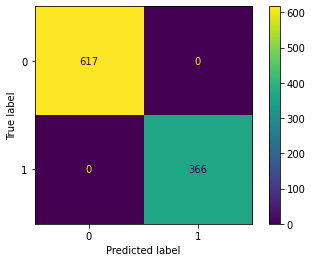

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()